# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Diana Mulhimah
- **Email:** mulhimahdiana@gmail.com
- **ID Dicoding:** diana_mulhimah

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim dan kondisi cuaca terhadap jumlah penyewaan sepeda?
- Bagiamana performa perubahan jumlah penyewaan sepeda dalam 2 tahun terakhir? Apakah terdapat peningkatan atau penurunan yang signifikan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset terdiri dari dua file utama: day.csv (data penyewaan per hari) dan hour.csv (data penyewaan per jam).
- Data berasal dari file CSV yang telah diimpor `import pandas as pd`  dan dibaca menggunakan pandas dengan function `read_csv()`.
- Menampilkan 5 baris pertama dari dataset untuk melihat struktur dan isinya dengan function `head()`.

### Assessing Data

##### Menilai tabel `day_df`

In [ ]:
# Menampilkan ringkasan struktur dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Mengecek missing value di setiap kolom
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# Mengecek dan menampilkan jumlah data duplikat dalam dataset
print('Jumlah duplikasi:', day_df.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
# Menampilkan statistik deskriptif untuk dataset
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Menilai tabel `hour_df`

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print('Jumlah duplikasi:', hour_df.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
bike_sharing_df = hour_df.copy()

**Insight:**
- Dari 2 dataset tidak ada data yang hilang atau duplikasi
- Kolom `dteday` masih dalam format `object`, perlu dikonversi ke `datetime` untuk analisis berbasis waktu.
- Terdapat kesalahan tipe data untuk kolom `dteday` kolom tersebut harusnya direpresentasikan sebagai tipe data `datetime`, bukan `object`.
- Terdapat kolom seperti `season`,	`yr`,	`mnth`,	`hr`,	`holiday`, `weekday`,	`workingday`,	`weathersit` yang berformat `int64` bisa diubah menjadi variabel kategorikal agar menjadi representasi yang lebih deskriptif.

### Cleaning Data

##### Memperbaiki tipe data pada `day_df`

In [ ]:
# mengganti tipe data
bike_sharing_df['dteday'] = pd.to_datetime(bike_sharing_df['dteday'])

category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in category_columns:
  bike_sharing_df[column] = bike_sharing_df[column].astype('category')

In [ ]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
# melakukan mapping pada beberapa kolom kategorikal agar lebih deskriptif
bike_sharing_df['season'] = bike_sharing_df.season.map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

bike_sharing_df['weathersit'] = bike_sharing_df.weathersit.map({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow',
    4: 'Snow + Fog'
})

bike_sharing_df['yr'] = bike_sharing_df.yr.map({0: '2011', 1: '2012'})

bike_sharing_df['mnth'] = bike_sharing_df.mnth.map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July',
    8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

bike_sharing_df['weekday'] = bike_sharing_df.weekday.map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [ ]:
# Mengecek jumlah nilai unik di setiap kolom dan mengurutkannya secara ascending.
bike_sharing_df.nunique().sort_values()

,0
workingday,2
yr,2
holiday,2
season,4
weathersit,4
weekday,7
mnth,12
hr,24
windspeed,30
temp,50


In [ ]:
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


##### Memperbaiki tipe data pada `hour_df`

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

category_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in category_columns:
  hour_df[column] = hour_df[column].astype('category')

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df['season']=hour_df.season.map({
    1:'Spring',
    2:'Summer',
    3:'Fall',
    4:'Winter'
    })

hour_df['weathersit'] = hour_df.weathersit.map({
    1:'Clear',
    2:'Mist + Cloudy',
    3:'Light Snow',
    4:'Snow + Fog'
    })

hour_df['yr']=hour_df.yr.map({0:'2011',1:'2012'})
hour_df['mnth']=hour_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
hour_df['weekday']=hour_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [ ]:
hour_df.nunique().sort_values()

,0
workingday,2
yr,2
holiday,2
season,4
weathersit,4
weekday,7
mnth,12
hr,24
windspeed,30
temp,50


In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Sudah menyesuaikan format pada kolom `dteday` dari format `object` diubah ke format `datetime`.
- Format sudah diperbaiki agar menjadi variabel kategorikal `season`,	`yr`,	`mnth`,	`hr`,	`holiday`, `weekday`,	`workingday`,	`weathersit`.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [ ]:
bike_sharing_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1049,1050,2011-02-16,Spring,2011,Feb,11,0,Wed,1,Clear,0.34,0.3030,0.34,0.2985,7,59,66
14581,14582,2012-09-04,Fall,2012,Sep,18,0,Tue,1,Clear,0.76,0.7424,0.75,0.2239,94,745,839
13031,13032,2012-07-02,Fall,2012,July,4,0,Mon,1,Mist + Cloudy,0.72,0.6667,0.54,0.2985,2,10,12
3603,3604,2011-06-04,Summer,2011,June,1,0,Sat,0,Clear,0.54,0.5152,0.64,0.1045,14,80,94
14892,14893,2012-09-17,Fall,2012,Sep,17,0,Mon,1,Mist + Cloudy,0.64,0.6061,0.65,0.2239,102,740,842


In [ ]:
bike_sharing_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,0.0,Sat,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
bike_sharing_df.groupby(["season","weathersit"], observed=False).agg({
    "cnt" : ['min', 'max', 'mean',]
})

cnt                   
                       min    max        mean
season weathersit                            
Spring Clear           1.0  801.0  122.055535
       Mist + Cloudy   1.0  712.0  103.074689
       Light Snow      1.0  520.0   58.650407
       Snow + Fog     23.0  164.0   74.333333
Summer Clear           1.0  873.0  232.410983
       Mist + Cloudy   1.0  957.0  181.261364
       Light Snow      1.0  782.0  115.179803
       Snow + Fog      NaN    NaN         NaN
Fall   Clear           1.0  977.0  244.494207
       Mist + Cloudy   2.0  868.0  224.848997
       Light Snow      1.0  891.0  171.955390
       Snow + Fog      NaN    NaN         NaN
Winter Clear           1.0  967.0  209.463779
       Mist + Cloudy   1.0  905.0  201.483974
       Light Snow      1.0  856.0  116.453333
       Snow + Fog      NaN    NaN         NaN

In [ ]:
bike_sharing_df.groupby(["yr","mnth"], observed=False).agg({
    "cnt" : ['min', 'max', 'mean',]
})

cnt                 
          min  max        mean
yr   mnth                     
2011 Jan    1  249   55.507267
     Feb    1  327   74.291217
     Mar    1  336   87.732877
     Apr    1  530  131.947149
     May    1  611  182.555108
     June   1  638  199.322222
     July   1  596  189.974462
     Aug    1  651  186.991792
     Sep    1  628  177.709902
     Oct    1  625  166.232840
     Nov    1  553  142.095967
     Dec    1  477  117.844804
2012 Jan    1  559  130.558704
     Feb    1  610  149.041908
     Mar    1  957  221.904441
     Apr    1  822  242.651811
     May    1  873  263.259409
     June   4  900  281.708333
     July   2  913  273.665323
     Aug    3  941  288.310484
     Sep    3  977  303.573611
     Oct    1  963  280.848870
     Nov    1  729  212.623955
     Dec    1  759  166.729111

In [ ]:
bike_sharing_df.groupby(by='holiday', observed=False).agg({
    "casual" : ['min', 'max', 'mean',],
    "registered" : ['min', 'max', 'mean',]
})

casual                 registered                 
           min  max       mean        min  max        mean
holiday                                                   
0            0  367  35.408377          0  886  155.020203
1            0  272  44.718000          0  601  112.152000

In [ ]:
bike_sharing_df.groupby(by='weekday', observed=False).agg({
    "cnt" : ['min', 'max', 'mean',]
})

cnt                 
        min  max        mean
weekday                     
Sun       1  776  177.468825
Mon       1  968  183.744655
Tue       1  970  191.238891
Wed       1  977  191.130505
Thu       1  976  196.436665
Fri       1  957  196.135907
Sat       1  783  190.209793

### Explore `hour_df`

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menggabungkan berdasarkan dteday
bike_sharing_df = hour_df.merge(
    day_df,
    on='dteday',
    how='left',
    suffixes=('_hour', '_day'
    ))

bike_sharing_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear,...,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear,...,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear,...,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear,...,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear,...,Sat,0,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985


In [ ]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8225,8226,2011-12-14,Winter,2011,Dec,9,0,Wed,1,Mist + Cloudy,0.30,0.3333,0.61,0.0000,9,230,239
6231,6232,2011-09-22,Fall,2011,Sep,5,0,Thu,1,Mist + Cloudy,0.60,0.5152,0.94,0.1045,2,28,30
5209,5210,2011-08-09,Fall,2011,Aug,23,0,Tue,1,Clear,0.76,0.6818,0.48,0.2836,22,53,75
5919,5920,2011-09-09,Fall,2011,Sep,4,0,Fri,1,Light Snow,0.62,0.5455,0.94,0.1642,0,3,3
11481,11482,2012-04-28,Summer,2012,Apr,14,0,Sat,0,Clear,0.42,0.4242,0.38,0.1045,147,293,440


In [ ]:
hour_df.groupby(["season","weathersit"], observed=False).agg({
    "cnt" : ['min', 'max', 'mean',]
})

cnt                 
                     min  max        mean
season weathersit                        
Fall   Clear           1  977  244.494207
       Light Snow      1  891  171.955390
       Mist + Cloudy   2  868  224.848997
Spring Clear           1  801  122.055535
       Light Snow      1  520   58.650407
       Mist + Cloudy   1  712  103.074689
       Snow + Fog     23  164   74.333333
Summer Clear           1  873  232.410983
       Light Snow      1  782  115.179803
       Mist + Cloudy   1  957  181.261364
Winter Clear           1  967  209.463779
       Light Snow      1  856  116.453333
       Mist + Cloudy   1  905  201.483974

In [ ]:
hour_df.groupby(["yr","mnth"], observed=False).agg({
    "cnt" : ['min', 'max', 'mean',]
})

cnt                 
          min  max        mean
yr   mnth                     
2011 Apr    1  530  131.947149
     Aug    1  651  186.991792
     Dec    1  477  117.844804
     Feb    1  327   74.291217
     Jan    1  249   55.507267
     July   1  596  189.974462
     June   1  638  199.322222
     Mar    1  336   87.732877
     May    1  611  182.555108
     Nov    1  553  142.095967
     Oct    1  625  166.232840
     Sep    1  628  177.709902
2012 Apr    1  822  242.651811
     Aug    3  941  288.310484
     Dec    1  759  166.729111
     Feb    1  610  149.041908
     Jan    1  559  130.558704
     July   2  913  273.665323
     June   4  900  281.708333
     Mar    1  957  221.904441
     May    1  873  263.259409
     Nov    1  729  212.623955
     Oct    1  963  280.848870
     Sep    3  977  303.573611

In [ ]:
hour_df.groupby(by='holiday', observed=False).agg({
    "casual" : ['min', 'max', 'mean',],
    "registered" : ['min', 'max', 'mean',]
})

casual                 registered                 
           min  max       mean        min  max        mean
holiday                                                   
0            0  367  35.408377          0  886  155.020203
1            0  272  44.718000          0  601  112.152000

In [ ]:
hour_df.groupby(by='weekday', observed=False).agg({
    "cnt" : ['min', 'max', 'mean',]
})

cnt                 
        min  max        mean
weekday                     
Fri       1  957  196.135907
Mon       1  968  183.744655
Sat       1  783  190.209793
Sun       1  776  177.468825
Thu       1  976  196.436665
Tue       1  970  191.238891
Wed       1  977  191.130505

In [ ]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,NaN,Sat,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Cuaca cerah tetap menjadi kondisi terbaik untuk penyewaan sepeda, dengan puncaknya di musim gugur dan panas.
- Penyewaan sepeda meningkat secara signifikan dari tahun 2011 ke 2012.

## Visualization & Explanatory Analysis

### Bagaimana pengaruh musim dan kondisi cuaca terhadap jumlah penyewaan sepeda?

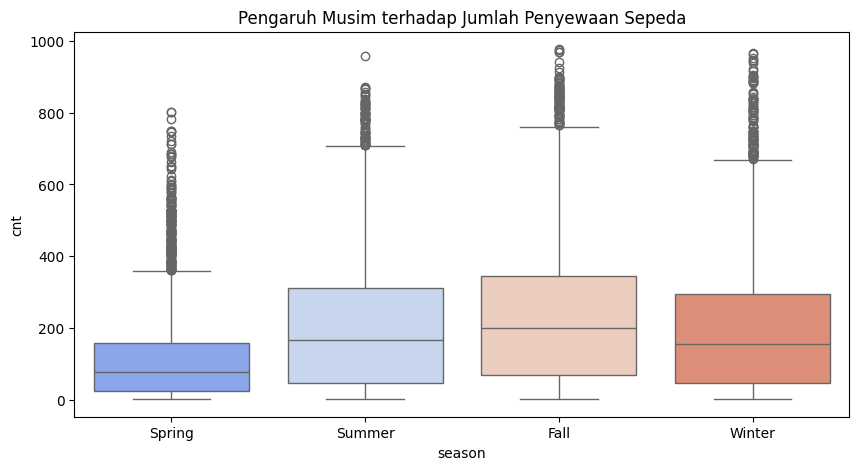

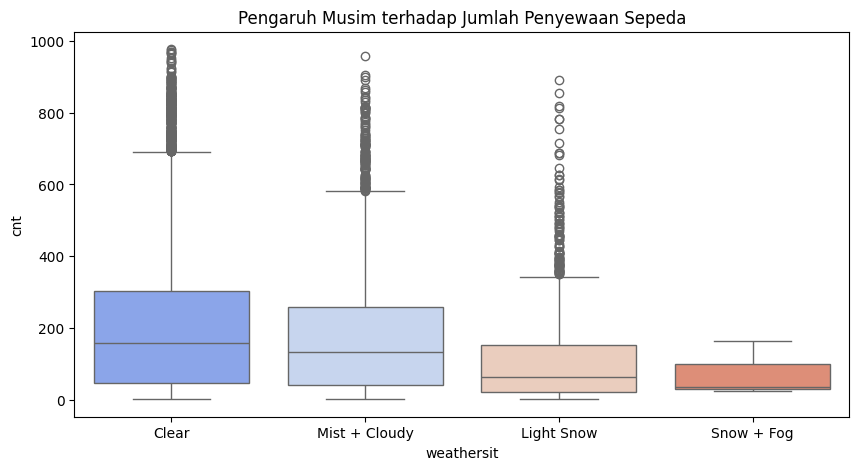

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='season', y='cnt', data=bike_sharing_df, hue='season', palette='coolwarm', legend=False)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='weathersit', y='cnt', data=bike_sharing_df, hue='weathersit', palette='coolwarm', legend=False)
plt.title('Pengaruh Musim terhadap Jumlah Penyewaan Sepeda')
plt.show()

### Bagiamana performa perubahan jumlah penyewaan sepeda dalam 2 tahun terakhir? Apakah terdapat peningkatan atau penurunan yang signifikan?

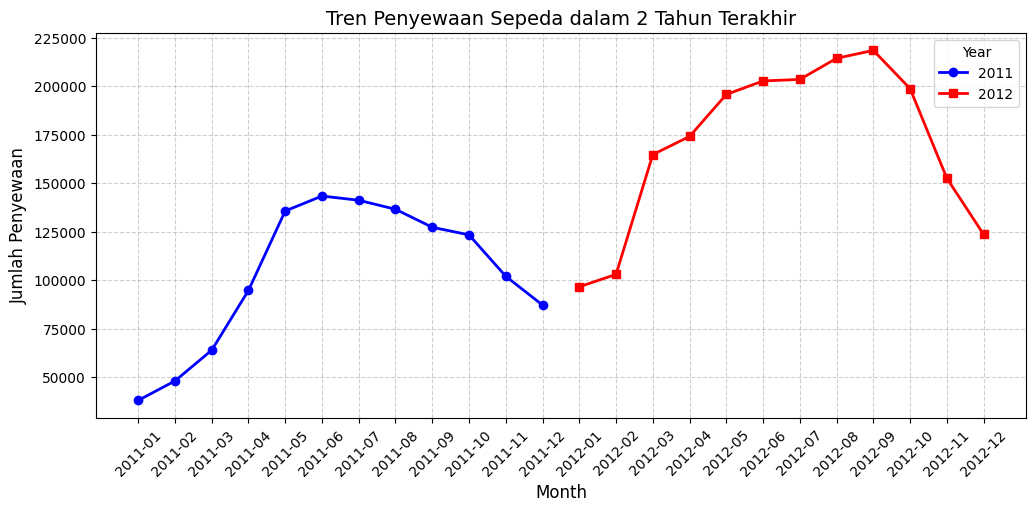

In [ ]:
bike_sharing_df['yr'] = bike_sharing_df['dteday'].dt.year
bike_sharing_df['mnth'] = bike_sharing_df['dteday'].dt.to_period('M').astype(str)
monthly = bike_sharing_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

rentals = {year: monthly[monthly['yr'] == year] for year in [2011, 2012]}

# Plot line chart
plt.figure(figsize=(12, 5))
for year, color, marker in zip([2011, 2012], ['b', 'r'], ['o', 's']):
    plt.plot(rentals[year]['mnth'], rentals[year]['cnt'], marker=marker, linestyle='-', color=color, linewidth=2, label=str(year))

plt.xticks(rotation=45)
plt.title('Tren Penyewaan Sepeda dalam 2 Tahun Terakhir', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.legend(title='Year', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Insight:**
-  Cuaca dan musim sangat mempengaruhi pola penyewaan sepeda, dengan penyewaan tertinggi di musim gugur (Fall) dan saat cuaca cerah.
- Penyewaan sepeda mengalami pola musiman, meningkat saat musim panas dan menurun saat musim dingin. Tahun 2012 menunjukkan pertumbuhan signifikan dibandingkan 2011.

In [ ]:
bike_sharing_df.to_csv("bike.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Musim dan kondisi cuaca berpengaruh besar terhadap tingkat penyewaan sepeda. Jumlah penyewaan mencapai puncaknya pada musim gugur (Fall), terutama saat cuaca cerah, yang menunjukkan bahwa kondisi lingkungan yang nyaman mendorong lebih banyak penggunaan sepeda. Sebaliknya, musim dingin dan cuaca buruk menyebabkan penurunan jumlah penyewaan, kemungkinan karena suhu yang lebih rendah dan kondisi jalan yang kurang mendukung.
- Data menunjukkan adanya tren musiman yang berulang, di mana jumlah penyewaan meningkat selama musim panas dan menurun saat musim dingin. Secara keseluruhan, jumlah penyewaan sepeda pada tahun 2012 mengalami peningkatan yang cukup signifikan dibandingkan tahun 2011. Hal ini mengindikasikan adanya pertumbuhan minat dalam penggunaan sepeda